# Predicting Survivors of Titanic

This notebook looks into using various Python-based machine learning tools and libraries to build a model capable of predicting whether or not someone would survive the disaster that sunk Titanic

We are going to:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition
In a statement,
>Given parameters about a passenger, can we predict whether or not they would survive the disaster

## 2. Data

The original data is from Kaggle: https://www.kaggle.com/competitions/titanic/data

## 3. Evaluation

> The goal is to predict if someone would survive the disaster. The prediction metric is accuracy.

## 4. Features

**Create data dictionary**

Variable:	Definition - Key
* survival:	Survival - 0 = No, 1 = Yes
* pclass:	Ticket class - 1 = 1st, 2 = 2nd, 3 = 3rd
* sex:  	Sex
* Age:  	Age in years	
* sibsp:	# of siblings / spouses aboard the Titanic	
* parch:    # of parents / children aboard the Titanic	
* ticket:	Ticket number	
* fare: 	Passenger fare	
* cabin:    Cabin number	
* embarked:	Port of Embarkation - C = Cherbourg, Q = Queenstown, S = Southampton


## 5. Preparing the tool

In [2]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want plots to appear inside notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection  import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## 6. Load Data

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## 7. Data Exploration (EDA)

In [4]:
# Checking the data
train.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [5]:
test.head().T

,0,1,2,3,4
PassengerId,892,893,894,895,896
Pclass,3,3,2,3,3
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis","Wirz, Mr. Albert","Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
Sex,male,female,male,male,female
Age,34.5,47.0,62.0,27.0,22.0
SibSp,0,1,0,0,1
Parch,0,0,0,0,1
Ticket,330911,363272,240276,315154,3101298
Fare,7.8292,7.0,9.6875,8.6625,12.2875
Cabin,NaN,NaN,NaN,NaN,NaN


We can see that the Survived column is missing in our test data. This is because it is the label - the rest are features

In [6]:
# Lets review the shape of the Training data set
train.shape

(891, 12)

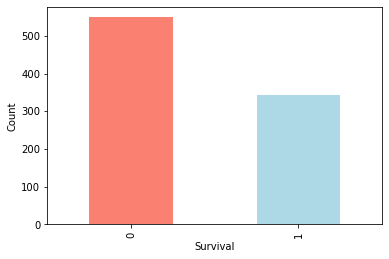

In [7]:
# Find out how many survived in the training data set
train["Survived"].value_counts().plot(kind="bar", color=["salmon", "lightblue"], xlabel="Survival", ylabel="Count");

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Note: Name, Sex, Ticket, Cabin, Embarked are feature with data type 'object'

In [9]:
# Checking for missing information
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin, and Embarked are the featuers with missing data

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
# Comparing Sex with Survival
pd.crosstab(train.Survived, train.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


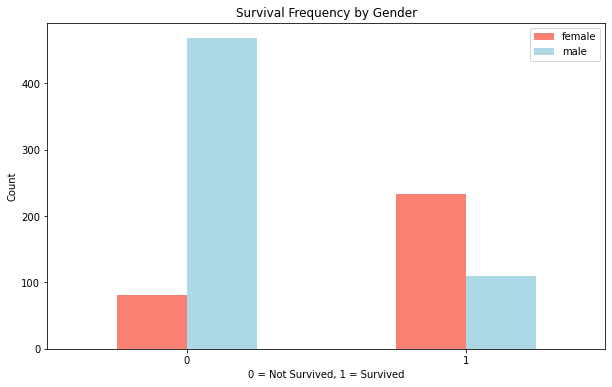

In [12]:
pd.crosstab(train.Survived, train.Sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon", "lightblue"]);
plt.title("Survival Frequency by Gender")
plt.xlabel("0 = Not Survived, 1 = Survived")
plt.ylabel("Count")
plt.legend(["female","male"])
plt.xticks(rotation=0);

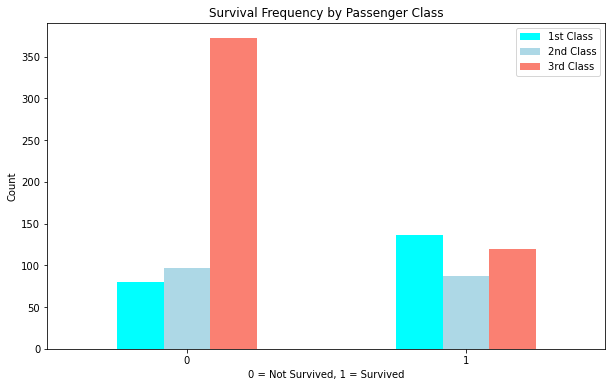

In [19]:
pd.crosstab(train.Survived, train.Pclass).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["Aqua","lightblue", "salmon"]);
plt.title("Survival Frequency by Passenger Class")
plt.xlabel("0 = Not Survived, 1 = Survived")
plt.ylabel("Count")
plt.legend(["1st Class","2nd Class", "3rd Class"])
plt.xticks(rotation=0);

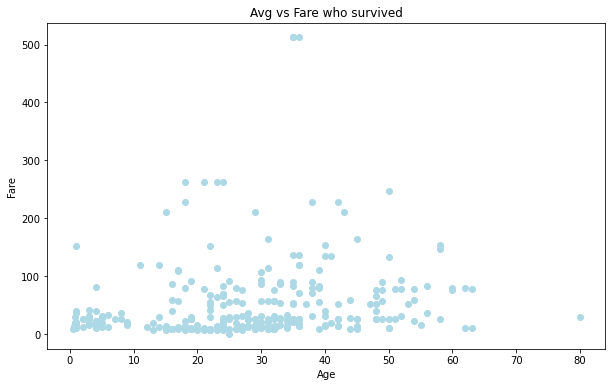

In [28]:
# Age and Fare vs Survival

plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(train.Age[train.Survived==1],
           train.Fare[train.Survived==1],
           c="lightblue");
plt.title("Avg vs Fare who survived")
plt.xlabel("Age")
plt.ylabel("Fare");

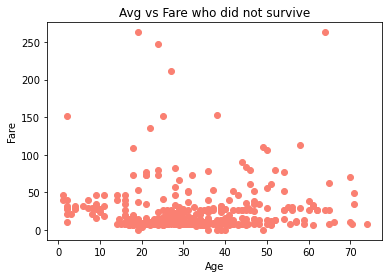

In [29]:
# Scatter with negative examples
plt.scatter(train.Age[train.Survived==0],
           train.Fare[train.Survived==0],
           c="salmon");
plt.title("Avg vs Fare who did not survive")
plt.xlabel("Age")
plt.ylabel("Fare");

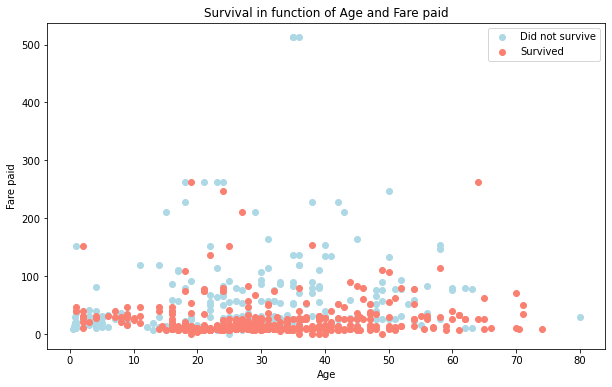

In [30]:
# Both together
# Creating another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(train.Age[train.Survived==1],
           train.Fare[train.Survived==1],
           c="lightblue");
# Scatter with negative examples
plt.scatter(train.Age[train.Survived==0],
           train.Fare[train.Survived==0],
           c="salmon");
plt.title("Survival in function of Age and Fare paid")
plt.xlabel("Age")
plt.ylabel("Fare paid")
plt.legend(["Did not survive", "Survived"]);

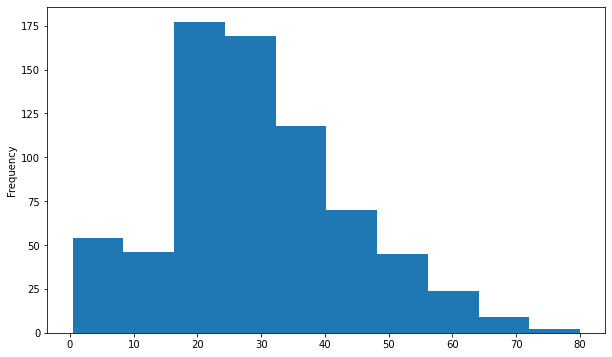

In [32]:
# Check distribution of the Age column with a Histogram
plt.figure(figsize=(10,6))
train.Age.plot.hist();